In [1]:
import numpy as np
import sklearn.preprocessing
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data = pd.read_csv("kc_house_data.csv")
print(data.shape)

data.drop(['id'], axis="columns", inplace=True)
data.drop(['date'], axis="columns", inplace=True)
#data.drop(['lat'], axis="columns", inplace=True)
#data.drop(['long'], axis="columns", inplace=True)

x = data.drop("price",axis=1)   #Feature Matrix
y = data["price"]          #Target Variable

print('x:', x.shape)
print('y:', y.shape)

x_3 = x.values[ :, 3 : 10]
x = np.column_stack([x, x_3]) #隨意給x增加了7列，x變25列，可以reshape 5x5 矩陣
print('x:', x.shape)

(21613, 21)
x: (21613, 18)
y: (21613,)
x: (21613, 25)


In [3]:
# 隨機挑選
train_x_disorder, test_x_disorder, train_y_disorder, test_y_disorder = train_test_split(x, y, train_size = 0.8, random_state = 33)

In [4]:
# 數據標準化
ss_x = sklearn.preprocessing.StandardScaler()
train_x_disorder = ss_x.fit_transform(train_x_disorder)
test_x_disorder = ss_x.transform(test_x_disorder)

ss_y = sklearn.preprocessing.StandardScaler()
train_y_disorder = ss_y.fit_transform(train_y_disorder.values.reshape(-1, 1))
test_y_disorder = ss_y.transform(test_y_disorder.values.reshape(-1, 1))

In [5]:
# 變厚矩陣
def weight_variable(shape):
    initial = tf.random.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

In [6]:
# bias
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [7]:
# Convolution, 變厚過程
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [8]:
# pool 長寬縮小一倍
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
0 誤差= 489.956
1 誤差= 26.298561
2 誤差= 17.076744
3 誤差= 6.0832343
4 誤差= 2.3676395
5 誤差= 1.3145493
6 誤差= 1.0681858
7 誤差= 1.043101
8 誤差= 1.0501637
9 誤差= 1.0297278
10 誤差= 0.9822456
11 誤差= 0.9253564
12 誤差= 0.87650716
13 誤差= 0.8438927
14 誤差= 0.82164085
15 誤差= 0.7974921
16 誤差= 0.765245
17 誤差= 0.7307142
18 誤差= 0.703949
19 誤差= 0.6870058
20 誤差= 0.67208934
21 誤差= 0.65111625
22 誤差= 0.6265153
23 誤差= 0.60953
24 誤差= 0.6050254
25 誤差= 0.60205287
26 誤差= 0.5925597
27 誤差= 0.58242136
28 誤差= 0.57570714
29 誤差= 0.56287414
30 誤差= 0.5409936
31 誤差= 0.5199918
32 誤差= 0.50424176
33 誤差= 0.49064815
34 誤差= 0.4776737
35 誤差= 0.46833736
36 誤差= 0.46188292
37 誤差= 0.45285648
38 誤差= 0.43967193
39 誤差= 0.42531174
40 誤差= 0.4119309
41 誤差= 0.40012413
42 誤差= 0.3916049
43 誤差= 0.3867741
44 誤差= 0.3819996
45 誤差= 0.37529856
46 誤差= 0.36862275
47 誤差= 0.36276963
48 誤差= 0.3575461
49 誤差= 0.3541369
50 誤差= 0.35216317
51 誤差= 0.349376

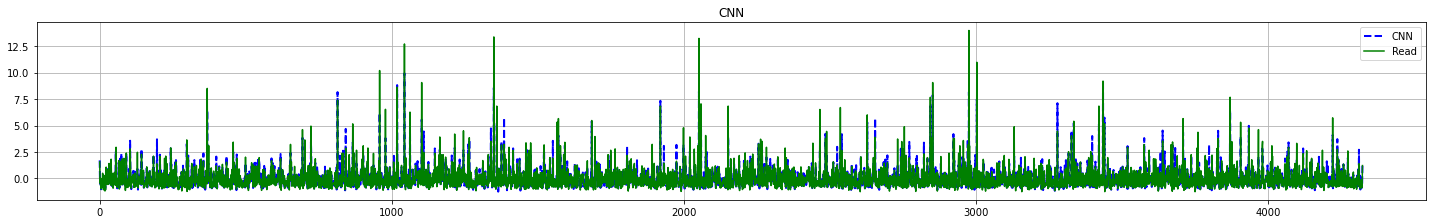

In [10]:
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 25]) #原始資料的維度: 25
ys = tf.placeholder(tf.float32, [None, 1]) #輸出資料的維度: 1

keep_prob = tf.placeholder(tf.float32) #dropout的比例

x_image = tf.reshape(xs, [-1, 5, 5, 1]) #原始資料16轉成二維圖片5*5
## conv1 layer
w_conv1 = weight_variable([2, 2, 1, 32]) # patch 2x2, in size 1, out size 32, 每個像素變成32個像素->變厚
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1) #output size 2x2x32

## conv2 layer
w_conv2 = weight_variable([2, 2, 32, 64]) # patch 2x2, in size 32, out size 64, 每個像素變成64個像素->變厚
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_conv1, w_conv2) + b_conv2) #output size 4x4x64

## fc1 layer
w_fc1 = weight_variable([5 * 5 * 64, 512]) # 4 x 4, 高度64的三維圖片, 拉平成512長的一維數值
b_fc1 = bias_variable([512])

h_pool2_flat = tf.reshape(h_conv2, [-1, 5 * 5 * 64]) # 4 x 4, 高度64的三維圖片, 拉平成512長的一維數值
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob) # dropout 比例為keep_prob的元素

## fc2 layer
w_fc2 = weight_variable([512, 1]) #512長的一維數值壓縮成長度為1的數值
b_fc2 = bias_variable([1]) #bias

# result
prediction = tf.matmul(h_fc1_drop, w_fc2) + b_fc2

# 計算 predition與y差距->suare()平方, sum()求和, mean()平均值
cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

# 0.01學習效率, minimize(loss)減小loss誤差
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

#訓練500次
for i in range(200):
    sess.run(train_step, feed_dict={xs: train_x_disorder, ys: train_y_disorder, keep_prob: 0.7})
    print(i, '誤差=', sess.run(cross_entropy, feed_dict={xs: train_x_disorder, ys: train_y_disorder, keep_prob: 1.0})) #output loss

#可視化
prediction_value = sess.run(prediction, feed_dict={xs: test_x_disorder, ys:test_y_disorder, keep_prob: 1.0})
#畫圖
fig = plt.figure(figsize=(20, 3)) #dpi參數指定繪圖對象的分辨率，即每英吋多少個像素，缺省值為80
axes = fig.add_subplot(1, 1, 1)
line1, = axes.plot(range(len(prediction_value)), prediction_value, 'b--', label='CNN', linewidth=2)
line3, = axes.plot(range(len(test_y_disorder)), test_y_disorder, 'g', label='Read')

axes.grid()
fig.tight_layout()
plt.legend(handles=[line1, line3])
plt.title('CNN')
plt.show()